In [1]:
import pyrosetta
pyrosetta.distributed.maybe_init(**{
    "options": "-corrections::beta_nov16 true",
    "extra_options":{
        "-out:level": "100",
}})

In [2]:
# split state Y predictions

from glob import glob
import json

sw = pyrosetta.rosetta.protocols.simple_moves.SwitchChainOrderMover()
sw.chain_order('1')

for design_fname in glob('/home/broerman/projects/CSD/round_2/af2/af2_models/*AB*.pdb'):
    design_name_split = design_fname.split('/')[-1][:-4].split('_')
    prediction_dict = json.load(open(f"/home/broerman/projects/CSD/round_2/af2/af2_models/{'_'.join(design_name_split[:-1])}_prediction_results.json"))
    if prediction_dict['rmsd_to_input'] < 4:
        pose_AY, pose_BY = pyrosetta.pose_from_pdb(design_fname).split_by_chain()
        design_name_split[0] = design_name_split[0][:5] + 'AY'
        sw.apply(pose_AY)
        pose_AY.dump_pdb(f"/home/broerman/projects/CSD/round_2/af2/split_Y/{'_'.join(design_name_split)}.pdb")
        design_name_split[0] = design_name_split[0][:5] + 'BY'
        sw.apply(pose_BY)
        pose_BY.dump_pdb(f"/home/broerman/projects/CSD/round_2/af2/split_Y/{'_'.join(design_name_split)}.pdb")

<AxesSubplot:ylabel='Count'>

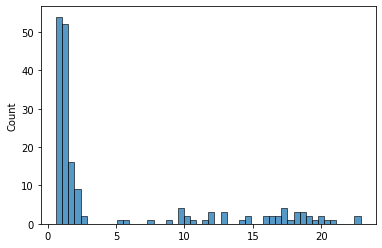

In [2]:
# investigate metrics

from glob import glob
import json
import seaborn as sns

rmsds = []

for json_fname in glob('/home/broerman/projects/CSD/round_2/af2/af2_models/*.json'):
    prediction_dict = json.load(open(json_fname))
    rmsds.append(prediction_dict['rmsd_to_input'])

sns.histplot(rmsds, bins=50)

In [3]:
# list good designs

from glob import glob
import json

good_models = []

for design_fname in sorted(glob('/home/broerman/projects/CSD/round_2/af2/af2_models/*.pdb')):
    design_name_split = design_fname.split('/')[-1][:-4].split('_')
    prediction_dict = json.load(open(f"/home/broerman/projects/CSD/round_2/af2/af2_models/{'_'.join(design_name_split[:-1])}_prediction_results.json"))
    if prediction_dict['rmsd_to_input'] < 4:
        good_models.append(design_fname)

with open('good_models.list', 'w') as f:
    for design in good_models:
        f.write(design + '\n')